## Reading the dataset

In [1]:
# Importing pandas library
import pandas as pd
import numpy as np
# Importing the csv data files 
data = pd.read_csv('bank-full.csv',sep=';',error_bad_lines=False, warn_bad_lines=True)

# Preinting some information about the dataset
print data.head()
print data.shape
print 'Columns of dataset- \n', data.columns
data_temp = data

print data.info()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)
Columns of dataset- 
Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
     

### Data Cleaning

In [2]:
# Function which counts the number of null values for each column
def count_null_values(dataset, column_list):
    for i in range (len(column_list)):
        print "The total number of null values in :",column_list[i]
        print dataset[column_list[i]].isnull().sum()
    return

def print_uniques(dataset, column_list):
    for i in range (len(column_list)):
        print "Unique values for the column:",column_list[i]
        print dataset[column_list[i]].unique()
        print '\n'
    return


# Replacing the pdays -1 value with 0
data['pdays']= data['pdays'].replace(-1, 0)

# Printing the null and unique values for each attribute in the dataset
print_uniques(data, data.columns)
count_null_values(data, data.columns)
print data.describe()

Unique values for the column: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


Unique values for the column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


Unique values for the column: marital
['married' 'single' 'divorced']


Unique values for the column: education
['tertiary' 'secondary' 'unknown' 'primary']


Unique values for the column: default
['no' 'yes']


Unique values for the column: balance
[ 2143    29     2 ...  8205 14204 16353]


Unique values for the column: housing
['yes' 'no']


Unique values for the column: loan
['no' 'yes']


Unique values for the column: contact
['unknown' 'cellular' 'telephone']


Unique values for the column: day
[ 5  6  7  8  9 12 13 14 15 16 19 20

In [3]:
# Data Normalizing
from sklearn.preprocessing import StandardScaler 
data_norm = data
scaler_z = StandardScaler()

num_d = data_norm.select_dtypes(exclude=['object'])
data_norm[num_d.columns] = scaler_z.fit(num_d).transform(num_d)

# Getting information of the dataset after normalization
print data_norm.head(10)
print data_norm[num_d.columns].mean(axis= 0)
print data_norm.describe()

C:\Users\user\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


        age           job   marital  education default   balance housing loan  \
0  1.606965    management   married   tertiary      no  0.256419     yes   no   
1  0.288529    technician    single  secondary      no -0.437895     yes   no   
2 -0.747384  entrepreneur   married  secondary      no -0.446762     yes  yes   
3  0.571051   blue-collar   married    unknown      no  0.047205     yes   no   
4 -0.747384       unknown    single    unknown      no -0.447091      no   no   
5 -0.559037    management   married   tertiary      no -0.371551     yes   no   
6 -1.218254    management    single   tertiary      no -0.300608     yes  yes   
7  0.100181  entrepreneur  divorced   tertiary     yes -0.446762     yes   no   
8  1.606965       retired   married    primary      no -0.407679     yes   no   
9  0.194355    technician    single  secondary      no -0.252657     yes   no   

   contact       day month  duration  campaign     pdays  previous poutcome  \
0  unknown -1.298476   may  0

## Conducting Exploratory Data Analysis

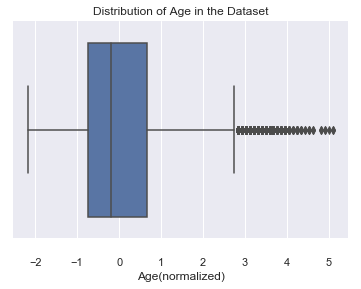

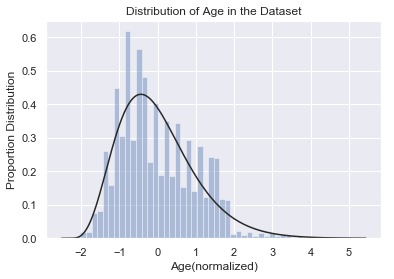

In [4]:
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt


# Visualization of Column- age (numeric)
sns.boxplot(x="age", data=data_norm).set(title = 'Distribution of Age in the Dataset', xlabel = 'Age(normalized)')
sns.despine(offset=10, trim=True)
plt.show()


from scipy import stats
sns.distplot(data_norm["age"], kde=False, fit=stats.gamma).set(title = 'Distribution of Age in the Dataset', xlabel = 'Age(normalized)', ylabel = 'Proportion Distribution' )
plt.show()

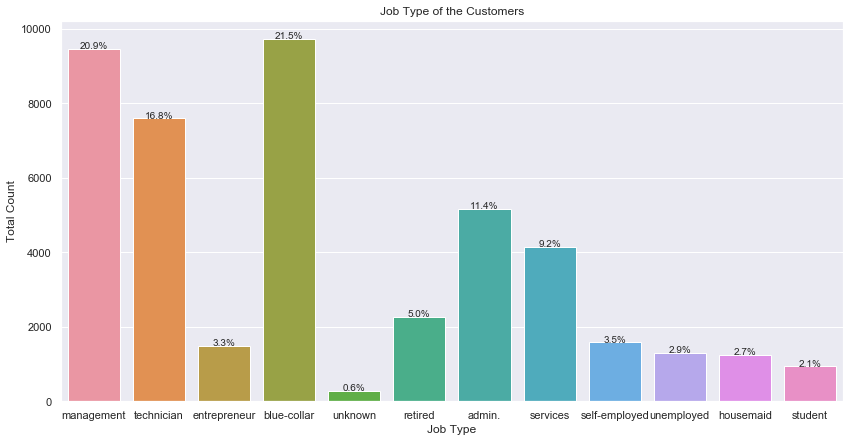

In [5]:
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

# Visualization of Column- Job Type
plt.figure(figsize=(14,7))
ax = sns.countplot(x='job',  data=data_norm)
ax.set(title = "Job Type of the Customers", xlabel="Job Type", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()


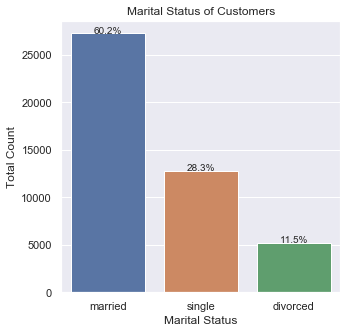

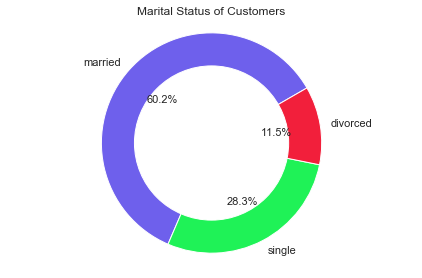

In [6]:
# Visualization of Column- Marital Status
plt.figure(figsize=(5,5))
ax = sns.countplot(x='marital',  data=data_norm)
ax.set(title = "Marital Status of Customers", xlabel="Marital Status", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

# Displaying the distribution of Marital Status in a Pie chart
labels = data_norm['marital'].unique()
sizes = [60.2,  28.3, 11.5 ]
#colors
colors = ['#6E60EC','#1FF257','#F21F3B']
 
plt.rcParams.update({'font.size': 11})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Marital Status of Customers")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

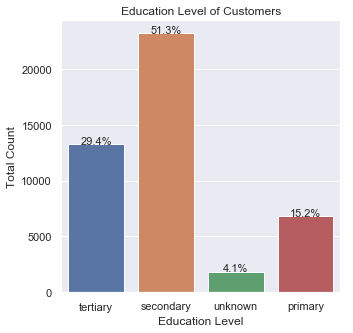

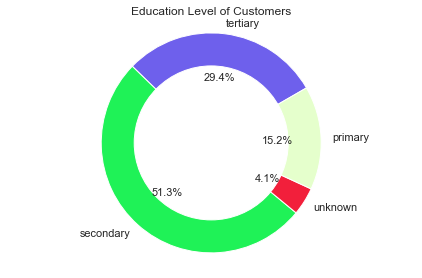

In [7]:
# Visualization of Column- Education Level

plt.figure(figsize=(5,5))
ax = sns.countplot(x='education',  data=data_norm)
ax.set(title = "Education Level of Customers", xlabel="Education Level", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

# Displaying the distribution of Education Level in a Pie chart
labels = data_norm['education'].unique()
sizes = [29.4,  51.3, 4.1, 15.2]
#colors
colors = ['#6E60EC','#1FF257','#F21F3B', '#E5FFCC']
 
plt.rcParams.update({'font.size': 11})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Education Level of Customers")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

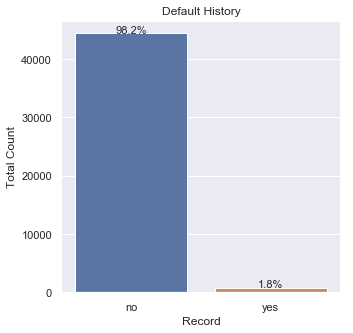

In [8]:
# Visualization of Column- default
plt.figure(figsize=(5,5))
ax = sns.countplot(x='default',  data=data_norm)
ax.set(title = "Default History", xlabel="Record", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()


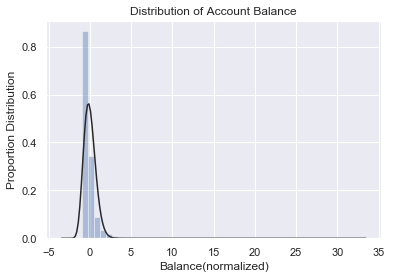

In [9]:
# Visualization of Column- balance: 
from scipy import stats
sns.distplot(data_norm["balance"], kde=False, fit=stats.gamma).set(title = 'Distribution of Account Balance', xlabel = 'Balance(normalized)', ylabel = 'Proportion Distribution' )
plt.show()

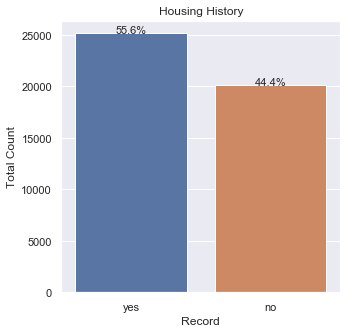

In [10]:
# Visualization of Column- housing

plt.figure(figsize=(5,5))
ax = sns.countplot(x='housing',  data=data_norm)
ax.set(title = "Housing History", xlabel="Record", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

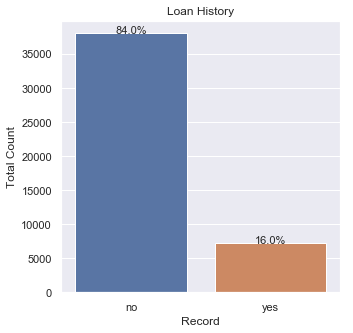

In [11]:
# Visualization of Column loan: 

plt.figure(figsize=(5,5))
ax = sns.countplot(x='loan',  data=data_norm)
ax.set(title = "Loan History", xlabel="Record", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

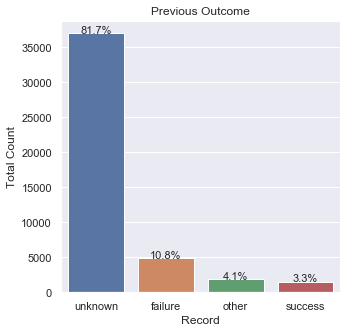

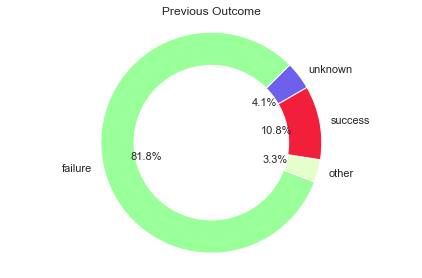

In [12]:
# Visualization of poutcome:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='poutcome',  data=data_norm)
ax.set(title = "Previous Outcome", xlabel="Record", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

# Displaying the distribution of Engine-type in a Pie chart
labels = data_norm['poutcome'].unique()
sizes = [4.1, 81.7, 3.3, 10.8 ]
#colors
colors = ['#6E60EC','#99ff99','#E5FFCC','#F21F3B' ]
 
plt.rcParams.update({'font.size': 11})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Previous Outcome")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

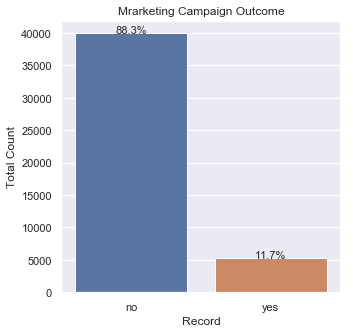

In [13]:
# Visualization of column: y 
plt.figure(figsize=(5,5))
ax = sns.countplot(x='y',  data=data_norm)
ax.set(title = "Mrarketing Campaign Outcome", xlabel="Record", ylabel = "Total Count")
total = float(len(data_norm))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

### Finding the Correlation between the Attributes

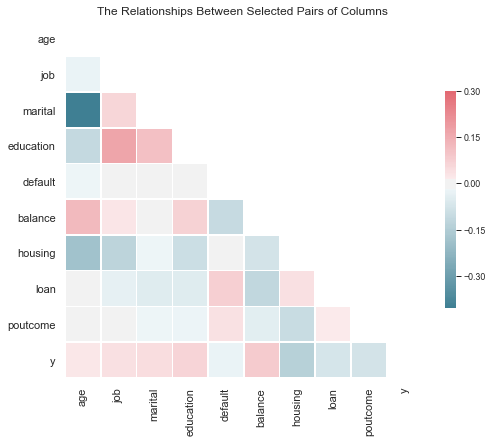

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
y            45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB
None


In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

label_endoded_data = data_norm.apply(LabelEncoder().fit_transform)
sns.set(style="white")

# Compute the correlation matrix
corr = label_endoded_data[['age','job','marital','education','default','balance','housing','loan','poutcome','y']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12, "axes.labelsize":12}) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('The Relationships Between Selected Pairs of Columns ')
plt.show()
print label_endoded_data.info()

### Task-2.3

The Stats of the price column 
count    4.521100e+04
mean     3.070663e-15
std      1.000011e+00
min     -3.081149e+00
25%     -4.237719e-01
50%     -3.002800e-01
75%      2.158743e-02
max      3.309478e+01
Name: balance, dtype: float64
        age           job  marital  education default   balance housing loan  \
0  1.606965    management  married   tertiary      no  0.256419     yes   no   
1  0.288529    technician   single  secondary      no -0.437895     yes   no   
2 -0.747384  entrepreneur  married  secondary      no -0.446762     yes  yes   
3  0.571051   blue-collar  married    unknown      no  0.047205     yes   no   
4 -0.747384       unknown   single    unknown      no -0.447091      no   no   

   contact       day month  duration  campaign     pdays  previous poutcome  \
0  unknown -1.298476   may  0.011016 -0.569351 -0.411009  -0.25194  unknown   
1  unknown -1.298476   may -0.416127 -0.569351 -0.411009  -0.25194  unknown   
2  unknown -1.298476   may -0.707361 -0.56935

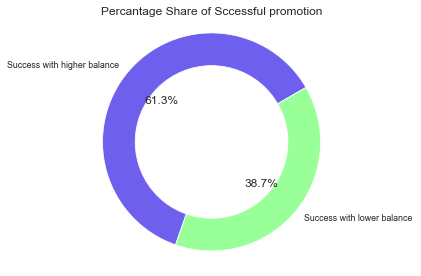

In [15]:
import statsmodels.api as sm
# The heat map shows a positive correlation between balance and y
# So the question arises does participents with higher balance have a higher tendenccey to patcipate in the promotion?

print 'The Stats of the price column \n', data['balance'].describe()
print data.head()
lower_balance = data[data["balance"] <= -0.30028] 
higher_balance = data[data["balance"] > -0.30028]

print lower_balance.size
print higher_balance.size

print 'Pertage count of No and Yes for higher balace customers-\n',higher_balance['y'].value_counts(normalize=True) * 100
print 'Pertage count of No and Yes for lower balace customers-\n',lower_balance['y'].value_counts(normalize=True) * 100


labels = ['Success with higher balance', 'Success with lower balance']
sizes = [61.3, 38.69]
#colors
colors = ['#6E60EC','#99ff99' ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)
ax1.set_title("Percantage Share of Sccessful promotion")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.show()

### Dealing with imbalanced dataset

In [16]:
print len(data[data['y'] == 'yes'])
print len(data[data['y'] == 'no'])

# Dataset with 'yes' as the classifier value
minor_class_index = label_endoded_data[label_endoded_data['y'] == 1].index

# Dataset with 'no' as the classifier value
major_class_index = label_endoded_data[label_endoded_data['y'] == 0].index

# Appling down sampling
down_sample_major_index = np.random.choice(major_class_index, len(minor_class_index), replace = False)

balanced_indices = np.concatenate([ minor_class_index, down_sample_major_index])
print balanced_indices.size

# Getting the balanced dataset
balanced_dataset = label_endoded_data.loc[balanced_indices]
print balanced_dataset.head()
print balanced_dataset.shape

5289
39922
10578
     age  job  marital  education  default  balance  housing  loan  contact  \
83    41    0        1          1        0     3223        1     0        2   
86    38    0        1          1        0      961        0     0        2   
87    23    9        1          1        0     2186        1     0        2   
129   37    7        1          1        0     3344        1     0        2   
168   36    0        1          2        0     1100        0     0        2   

     day  month  duration  campaign  pdays  previous  poutcome  y  
83     4      8      1038         0      0         0         3  1  
86     4      8      1359         0      0         0         3  1  
87     4      8      1313         0      0         0         3  1  
129    4      8       579         0      0         0         3  1  
168    4      8       673         1      0         0         3  1  
(10578, 17)


### Preparing the training and testing dataset

In [17]:
# Data Splitting stage
from sklearn.model_selection import train_test_split

# Splitting the dataset into classifier and non-classifier columns
X = balanced_dataset.drop('y', axis=1).values
y = balanced_dataset['y'].values
X.shape,y.shape

# Creating the datasets according to 3 different suites
X_Suite1_train, X_Suite1_test, y_Suite1_train, y_Suite1_test = train_test_split(X, y, test_size= 0.5, train_size=0.5, random_state=42)

X_Suite2_train, X_Suite2_test, y_Suite2_train, y_Suite2_test = train_test_split(X, y, test_size= 0.4, train_size=0.6, random_state=42)

X_Suite3_train, X_Suite3_test, y_Suite3_train, y_Suite3_test = train_test_split(X, y, test_size= 0.2, train_size=0.8, random_state=42)

print X_Suite3_train.shape, X_Suite3_test.shape, y_Suite3_train, y_Suite3_test


(8462L, 16L) (2116L, 16L) [0 1 1 ... 0 1 0] [0 0 0 ... 1 0 1]


### Implementing Classifier Model

In [18]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

# Model with datset Suite-1
rfc = RandomForestClassifier(bootstrap= False, min_samples_split= 5,  n_estimators=30)
rfc.fit(X_Suite1_train, y_Suite1_train)

predict = rfc.predict(X_Suite1_test)

# Getting the accuracy metric
acc = accuracy_score(predict, y_Suite1_test)
pre = precision_score(predict, y_Suite1_test)
rec = recall_score(predict, y_Suite1_test)
f1 = f1_score(predict, y_Suite1_test)

print 'Model Performance Statistic Suite-1: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite1_test, predict)
print '\n'

# Model with datset Suite-2
rfc = RandomForestClassifier(bootstrap= False, min_samples_split= 5,  n_estimators=30)
rfc.fit(X_Suite2_train, y_Suite2_train)

predict = rfc.predict(X_Suite2_test)

# Getting the accuracy metric
acc = accuracy_score(predict, y_Suite2_test)
pre = precision_score(predict, y_Suite2_test)
rec = recall_score(predict, y_Suite2_test)
f1 = f1_score(predict, y_Suite2_test)


print 'Model Performance Statistic Suite-2: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite2_test, predict)
print '\n'

# Model with datset Suite-3
rfc = RandomForestClassifier(bootstrap= False, min_samples_split= 5,  n_estimators=30)
rfc.fit(X_Suite3_train, y_Suite3_train)

predict = rfc.predict(X_Suite3_test)

# Getting the accuracy metric
acc = accuracy_score(predict, y_Suite3_test)
pre = precision_score(predict, y_Suite3_test)
rec = recall_score(predict, y_Suite3_test)
f1 = f1_score(predict, y_Suite3_test)

print 'Model Performance Statistic Suite-3: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite3_test, predict)
print '\n'

Model Performance Statistic Suite-1: 
Accuracy:  0.8392890905653243
Precision:  0.8524953789279113
Recall:  0.8364163946318462
F1 Score:  0.8443793482240937
Confusion Metrix:
[[2133  451]
 [ 399 2306]]


Model Performance Statistic Suite-2: 
Accuracy:  0.8459357277882797
Precision:  0.8577348066298343
Recall:  0.8445149592021759
F1 Score:  0.8510735495660119
Confusion Metrix:
[[1717  343]
 [ 309 1863]]


Model Performance Statistic Suite-3: 
Accuracy:  0.8568052930056711
Precision:  0.8772893772893773
Recall:  0.8500443655723159
F1 Score:  0.8634520054078413
Confusion Metrix:
[[855 169]
 [134 958]]




In [19]:
# Naive Bayes Gaussian classifier
from sklearn.naive_bayes import GaussianNB

# Model with datset Suite-3
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_Suite1_train, y_Suite1_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_Suite1_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Suite1_test, y_pred))

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_Suite1_test)
pre = precision_score(y_pred, y_Suite1_test)
rec = recall_score(y_pred, y_Suite1_test)
f1 = f1_score(y_pred, y_Suite1_test)

print 'Model Performance Statistic Suite-1: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite1_test, y_pred)
print '\n'

# Model with datset Suite-3
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_Suite2_train, y_Suite2_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_Suite2_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Suite2_test, y_pred))

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_Suite2_test)
pre = precision_score(y_pred, y_Suite2_test)
rec = recall_score(y_pred, y_Suite2_test)
f1 = f1_score(y_pred, y_Suite2_test)

print 'Model Performance Statistic Suite-1: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite2_test, y_pred)
print '\n'

# Model with datset Suite-3
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_Suite3_train, y_Suite3_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_Suite3_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_Suite3_test, y_pred))

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_Suite3_test)
pre = precision_score(y_pred, y_Suite3_test)
rec = recall_score(y_pred, y_Suite3_test)
f1 = f1_score(y_pred, y_Suite3_test)

print 'Model Performance Statistic Suite-1: '
print 'Accuracy: ', acc
print 'Precision: ', pre
print 'Recall: ',rec
print 'F1 Score: ', f1
print 'Confusion Metrix:'
print confusion_matrix(y_Suite3_test, y_pred)
print '\n'

('Accuracy:', 0.7581773492153526)
Model Performance Statistic Suite-1: 
Accuracy:  0.7581773492153526
Precision:  0.7900184842883549
Recall:  0.7503511235955056
F1 Score:  0.7696740500630289
Confusion Metrix:
[[1873  711]
 [ 568 2137]]


('Accuracy:', 0.763468809073724)
Model Performance Statistic Suite-1: 
Accuracy:  0.763468809073724
Precision:  0.7992633517495396
Recall:  0.7544545849630595
F1 Score:  0.7762128325508606
Confusion Metrix:
[[1495  565]
 [ 436 1736]]


('Accuracy:', 0.7641776937618148)
Model Performance Statistic Suite-1: 
Accuracy:  0.7641776937618148
Precision:  0.8296703296703297
Recall:  0.7432321575061526
F1 Score:  0.7840761575075725
Confusion Metrix:
[[711 313]
 [186 906]]




### Companing the Performance of the ML Model

In [20]:
# Importing the performance metrix into a dataframe
performance_data = pd.read_csv('performance.csv',error_bad_lines=False, warn_bad_lines=True)
print performance_data

              ML Model Dataset  Accuracy  Precision  Recall  F1 Score
0        Random Forest  Suite1     0.853      0.864   0.835     0.849
1        Random Forest  Suite2     0.856      0.872   0.830     0.851
2        Random Forest  Suite3     0.863      0.869   0.834     0.851
3  Gaussian Classifier  Suite1     0.765      0.799   0.756     0.777
4  Gaussian Classifier  Suite2     0.769      0.804   0.756     0.779
5  Gaussian Classifier  Suite3     0.770      0.806   0.749     0.776


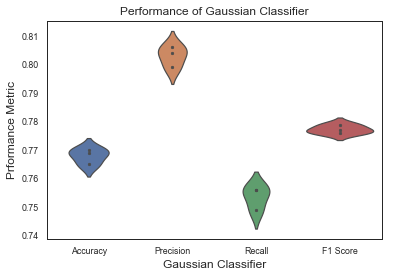

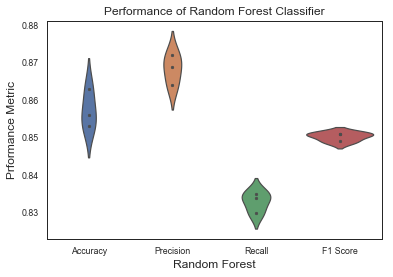

In [21]:
# Plotting the performance metrics of each of the classifier

G_Classifier = performance_data[performance_data["ML Model"] == 'Gaussian Classifier'] 
R_Forest = performance_data[performance_data["ML Model"] == 'Random Forest'] 

sns.violinplot(data=G_Classifier,inner="points").set(title = 'Performance of Gaussian Classifier', xlabel = 'Gaussian Classifier', ylabel = 'Prformance Metric' )

plt.show()
sns.violinplot(data=R_Forest ,inner="points").set(title = 'Performance of Random Forest Classifier', xlabel = 'Random Forest', ylabel = 'Prformance Metric' )

plt.show()

